# Slide material

## imports

### import qiskit libraries

In [1]:
from typing import List, Union
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
import pickle
import pprint
import time
import pdb

In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import qiskit.ignis.mitigation as mit
import qiskit.quantum_info as qi
# from qiskit.ignis.mitigation.measurement import complete_meas_cal, tensored_meas_cal, CompleteMeasFitter, TensoredMeasFitter

### import original library

In [3]:
import importlib
import star_bell_ineq
importlib.reload(star_bell_ineq)
from star_bell_ineq import *
import graph_lib
from graph_lib import *
import graph_state_lib
from graph_state_lib import *

### load account

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')
# provider = IBMQ.get_provider(hub="ibm-q-utokyo", group="reservations", project="reservations")
print(provider)

<AccountProvider for IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>


## create star graph information from size 2 to 27
we test the size from 2 to 27

change the number of 27 of "max_size = len(vertex_list[:27]) # largest graph size" if you want to try up to other size

In [5]:
vertex_list =  [ 8,
                11, 
                 5, 14,
                 9,  3, 13, 
                 2, 12, 16,
                 1, 15, 19,
                10,  0, 18, 20,
                  4, 22,  7, 21,
                 17, 25, 6, 23,
                 26, 24] # qubit layout
max_size = 27 # largest graph size
Fs = [[0] for n in range(1, max_size + 1)] # subsets of focused vertices of graph size 1 to max_size
adj_lists = [adjacency_list_for_star_graph(n) for n in range(1, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
shots_per_circuit = 1 << 13 # shots per one execution
graph_sizes = [len(adj_list) for adj_list in adj_lists]
system_size = len(vertex_list)

In [6]:
print("max_size:", max_size)
print("system_size:", system_size)
print("shots_per_circuit:", shots_per_circuit)
print("graph_sizes:", graph_sizes)

max_size: 27
system_size: 27
shots_per_circuit: 8192
graph_sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


In [7]:
 # indicate how to connect qubits
order = [[0,1],
         [0,2],[1,3],
         [0,4],[2,5],[3,6],
         [5,7],[6,8],[3,9], 
         [7,10],[8,11],[9,12],
         [8,13],[10,14],[11,15],[12,16],
         [10,17],[12,18],[13,19],[15,20],
         [15,21],[18,22],[19,23],[20,24],
         [22,25],[24,26]]

In [8]:
qubit_depths = [0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9]
print(qubit_depths)
print(len(qubit_depths))

[0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9]
27


## prepare quantum circuits (from size 2 to 27)

In [9]:
qcs = [refocusing_last_star_graph_state(size, order[:size-1], qubit_depths[:size], system_size) for size in range(1, max_size+1)]
qcs_list, nums_divide_list, nums_meas_cal_list, metadatas_list, _, initial_layouts_list = \
    prepare_grouping_star_graph_qcs_list(qcs, 
                                        adj_lists, 
                                        measure_last=True,
                                        optimization_level=0,
                                        initial_layouts=[vertex_list[:system_size]] * len(qcs),
                                        method="tensored",
                                        mitigation_limit=100)
print("the number of graph state circuits is: ", len(qcs_list))

the number of graph state circuits is:  104


In [10]:
ops_qcs_list = [qc.count_ops() for qc in qcs_list]
print(len(qcs_list), "quantum circuits")
print("length of initial_layouts_list: ", len(initial_layouts_list))

104 quantum circuits
length of initial_layouts_list:  104


In [11]:
qcs_depths = [qc.depth() for qc in qcs[1:]]
print("qcs_depth:", qcs_depths)

qcs_depth: [4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12]


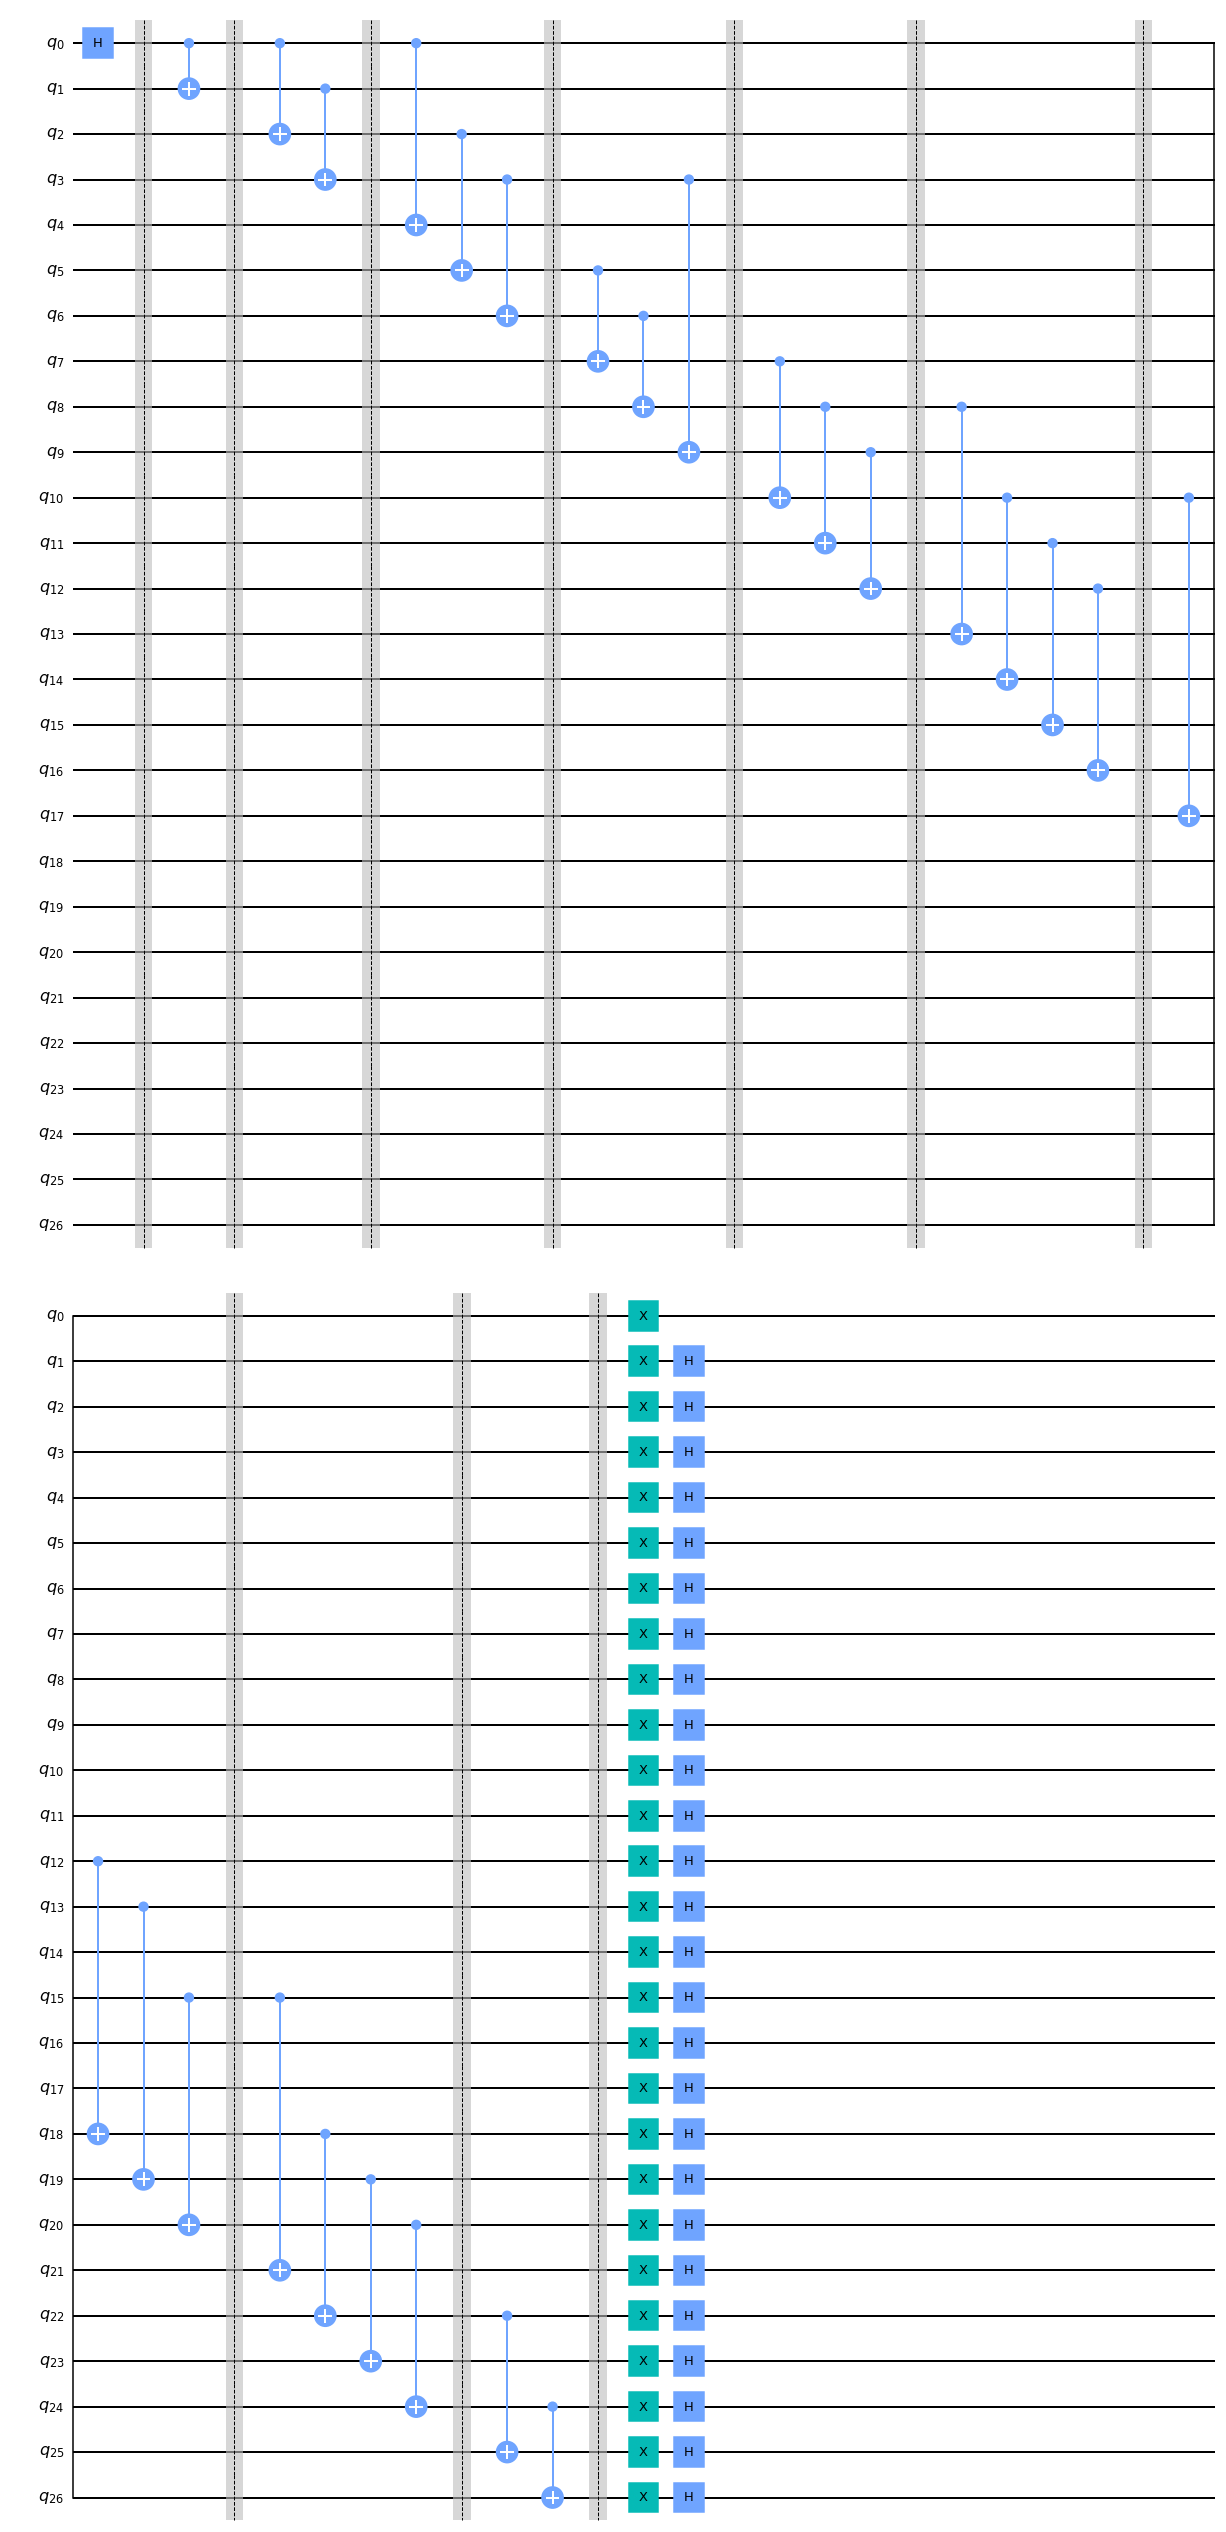

In [13]:
qcs[26].draw("mpl")

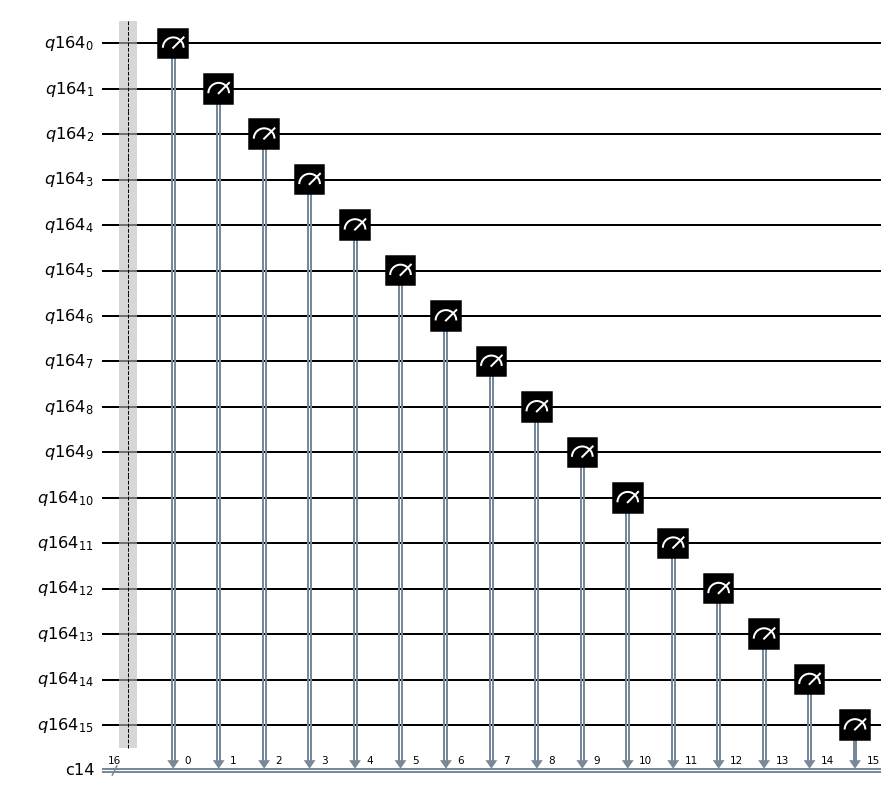

In [12]:
qcs_list[58].draw("mpl")

In [14]:
vertex_list =  [19, 
                25, 
                20, 33,
                18, 21, 32,
                34, 17, 12, 31,
                22, 35, 16, 8, 39, 
                11, 30, 23, 36, 15, 7, 45,
                40, 9, 4, 29, 26, 37, 24, 6, 46,
                14, 44, 49, 3, 28, 5, 47] # qubit layout
max_size = len(vertex_list) # largest graph size
Fs = [[0] for n in range(1, max_size + 1)] # subsets of focused vertices of graph size 1 to max_size
adj_lists = [adjacency_list_for_star_graph(n) for n in range(1, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
shots_per_circuit = 1 << 13 # shots per one execution
graph_sizes = [len(adj_list) for adj_list in adj_lists]
system_size = len(vertex_list)

In [15]:
print("max_size:", max_size)
print("system_size:", system_size)
print("shots_per_circuit:", shots_per_circuit)
print("graph_sizes:", graph_sizes)

max_size: 39
system_size: 39
shots_per_circuit: 8192
graph_sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [16]:
# indicate how to connect qubits
order = [[0,1],
         [0,2],[1,3],
         [0,4],[2,5],[3,6],
         [3,7],[4,8],[5,9],[6,10],
         [5,11],[7,12],[8,13],[9,14],[10,15],
         [8,16],[10,17],[11,18],[12,19],[13,20],[14,21],[15,22],
         [12,23],[14,24],[16,25],[17,26],[18,27],[19,28],[20,29],[21,30],[22,31],
         [20,32],[22,33],[23,34],[25,35],[26,36],[30,37],[31,38]]

In [17]:
qubit_depths = [0, 
                1, 
                2, 2,
                3, 3, 3, 
                4, 4, 4, 4, 
                5, 5, 5, 5, 5, 
                6, 6, 6, 6, 6, 6, 6, 
                7, 7, 7, 7, 7, 7, 7, 7, 7,
                8, 8, 8, 8, 8, 8, 8]
print(qubit_depths)
print(len(qubit_depths))

[0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8]
39


In [19]:
qcs = [refocusing_last_star_graph_state(size, order[:size-1], qubit_depths[:size], system_size) for size in range(1, max_size+1)]
qcs_list, nums_divide_list, nums_meas_cal_list, metadatas_list, _, initial_layouts_list = \
    prepare_grouping_star_graph_qcs_list(qcs, 
                                        adj_lists, 
                                        measure_last=True,
                                        optimization_level=0,
                                        initial_layouts=[vertex_list[:system_size]] * len(qcs),
                                        method="tensored",
                                        mitigation_limit=100)
print("the number of graph state circuits is: ", len(qcs_list))

the number of graph state circuits is:  152


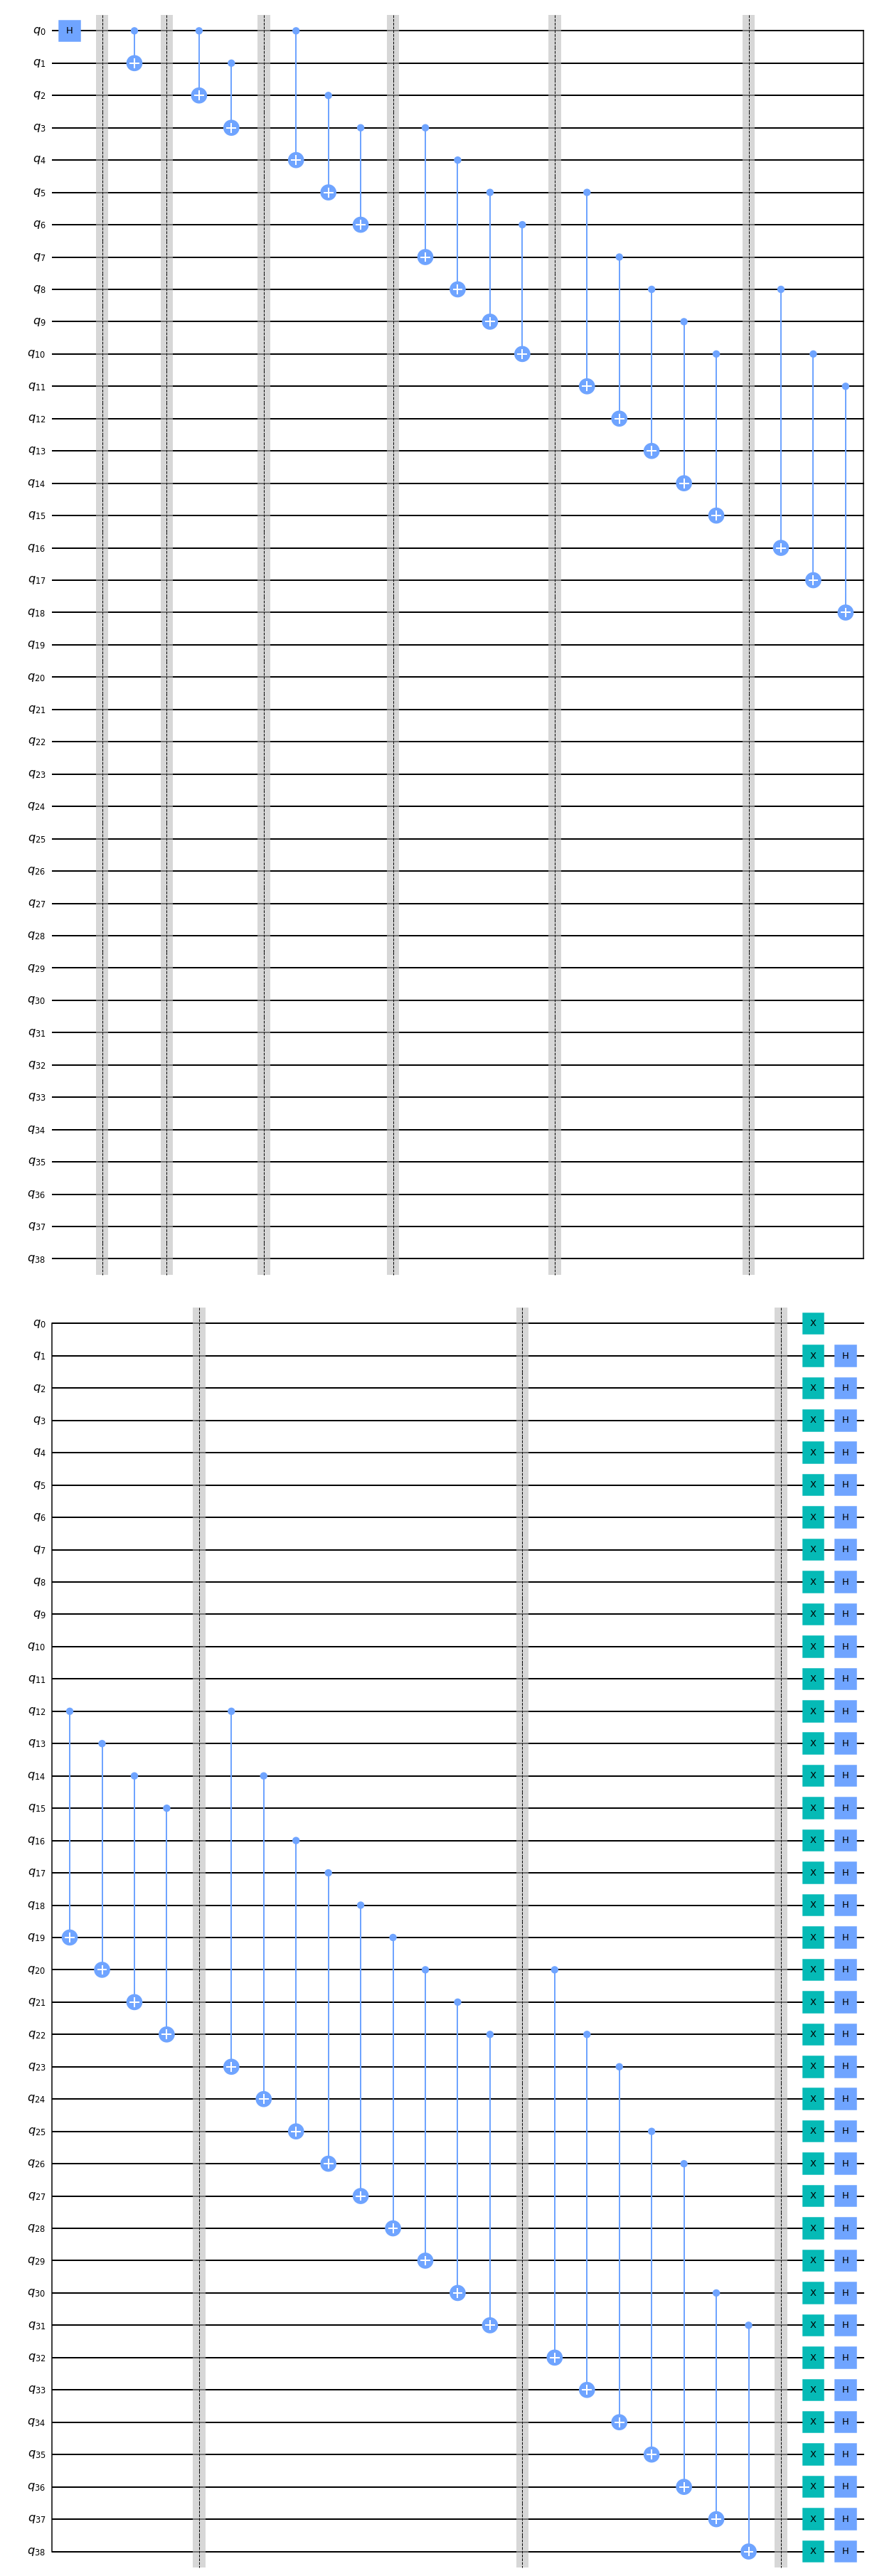

In [22]:
qcs[38].draw("mpl")

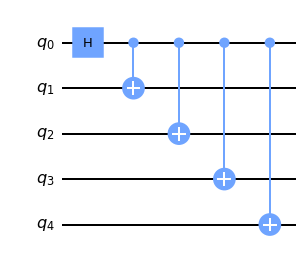

In [39]:
m = 5
ghz = QuantumCircuit(m)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)
ghz.cx(0, 3)
ghz.cx(0, 4)
ghz.draw("mpl")

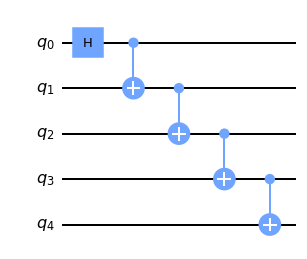

In [38]:
m = 5
ghz = QuantumCircuit(m)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(1, 2)
ghz.cx(2, 3)
ghz.cx(3, 4)
ghz.draw("mpl")

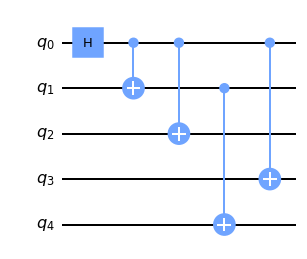

In [37]:
m = 5
ghz = QuantumCircuit(m)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)
ghz.cx(0, 3)
ghz.cx(1, 4)
ghz.draw("mpl")

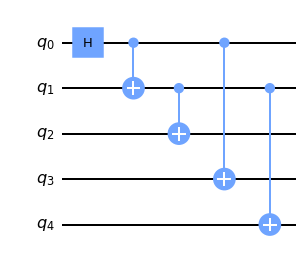

In [36]:
m = 5
ghz = QuantumCircuit(m)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(1, 2)
ghz.cx(0, 3)
ghz.cx(1, 4)
ghz.draw("mpl")

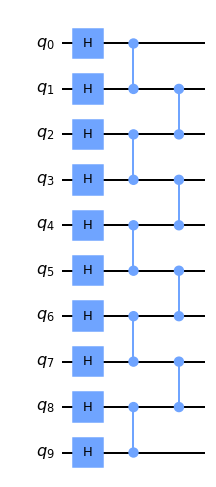

In [42]:
m = 10
path = QuantumCircuit(m)
path.h(range(m))
path.cz(0, 1)
path.cz(2, 3)
path.cz(4, 5)
path.cz(6, 7)
path.cz(8, 9)
path.cz(1, 2)
path.cz(3, 4)
path.cz(5, 6)
path.cz(7, 8)
path.draw("mpl")